In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
# Load the dataset
confirm = pd.read_csv('confirmed_rate_us.csv')
vaccine_tweet_sent = pd.read_csv('vaccine_tweet_sent_nozero.csv')
all_tweet_sent = pd.read_csv('2020_2022_all_sent.csv')

In [3]:
confirm

,Unnamed: 0,Date,confirmed_rate_us,confirmed_us,yesterday_confirmed_us,increased
0,0,01/22/2020,3.041937e-09,1,NaN,0
1,1,01/23/2020,3.041937e-09,1,1.0,0
2,2,01/24/2020,6.083874e-09,2,1.0,1
3,3,01/25/2020,6.083874e-09,2,2.0,0
4,4,01/26/2020,1.520968e-08,5,2.0,1
...,...,...,...,...,...,...
792,792,03/24/2022,2.413290e-01,79333998,79291983.0,1
793,793,03/25/2022,2.414681e-01,79379719,79333998.0,1
794,794,03/26/2022,2.414946e-01,79388425,79379719.0,1
795,795,03/27/2022,2.415191e-01,79396488,79388425.0,1


In [4]:
vaccine_tweet_sent = vaccine_tweet_sent.rename(columns={'date': 'Date'})
vaccine_tweet_sent

,Date,index,sum_sentiment_score,avg_sentiment_score,tweet_count
0,2020-01-09,0,-4.885399,-0.187900,26
1,2020-02-09,31,-3.423437,-0.085586,40
2,2020-03-09,60,-9.808869,-0.132552,74
3,2020-04-09,91,-5.198317,-0.148523,35
4,2020-05-09,121,2.607551,0.096576,27
...,...,...,...,...,...
467,2022-09-10,975,-6.546471,-0.198378,33
468,2022-09-11,976,-8.115179,-0.279834,29
469,2022-09-12,977,5.571819,0.214301,26
470,2022-09-13,978,-4.304051,-0.113264,38


In [5]:
all_tweet_sent = all_tweet_sent.drop('Unnamed: 0', axis=1)
all_tweet_sent.head()

,Year,Month,Day,Sentiment,Count,Avg_Per,Date
0,2020,1,29,negative,100304,0.826871,2020-01-29
1,2020,1,29,neutral,14862,0.122654,2020-01-29
2,2020,1,29,positive,5904,0.050476,2020-01-29
3,2020,1,30,negative,87525,0.808246,2020-01-30
4,2020,1,30,neutral,13103,0.129362,2020-01-30


In [6]:
negative_sentiment = all_tweet_sent[all_tweet_sent['Sentiment'] == 'negative']
neutral_sentiment = all_tweet_sent[all_tweet_sent['Sentiment'] == 'negative']
positive_sentiment = all_tweet_sent[all_tweet_sent['Sentiment'] == 'positive']
negative_sentiment.head()

,Year,Month,Day,Sentiment,Count,Avg_Per,Date
0,2020,1,29,negative,100304,0.826871,2020-01-29
3,2020,1,30,negative,87525,0.808246,2020-01-30
6,2020,1,31,negative,119826,0.827879,2020-01-31
9,2020,2,1,negative,115715,0.811955,2020-02-01
12,2020,2,2,negative,125394,0.824178,2020-02-02


In [7]:
from datetime import datetime

input_format = "%m/%d/%Y"  # The format of date_str_1
output_format = "%Y-%m-%d"  # The desired format
confirm['Date'] = confirm['Date'].apply(lambda x: datetime.strptime(x, input_format).strftime(output_format))

In [8]:
confirm.head()

,Unnamed: 0,Date,confirmed_rate_us,confirmed_us,yesterday_confirmed_us,increased
0,0,2020-01-22,3.041937e-09,1,NaN,0
1,1,2020-01-23,3.041937e-09,1,1.0,0
2,2,2020-01-24,6.083874e-09,2,1.0,1
3,3,2020-01-25,6.083874e-09,2,2.0,0
4,4,2020-01-26,1.520968e-08,5,2.0,1


In [9]:
confirm = confirm.drop('Unnamed: 0', axis=1)

In [10]:
df = confirm.merge(negative_sentiment, on='Date', how='inner').merge(vaccine_tweet_sent, on='Date', how='inner')

In [11]:
df.head()

,Date,confirmed_rate_us,confirmed_us,yesterday_confirmed_us,increased,Year,Month,Day,Sentiment,Count,Avg_Per,index,sum_sentiment_score,avg_sentiment_score,tweet_count
0,2020-02-09,3.650324e-08,12,12.0,0,2020,2,9,negative,84573,0.784561,31,-3.423437,-0.085586,40
1,2020-03-09,1.916420e-06,630,538.0,1,2020,3,9,negative,115926,0.819362,60,-9.808869,-0.132552,74
2,2020-04-09,1.449419e-03,476479,440933.0,1,2020,4,9,negative,252685,0.845454,91,-5.198317,-0.148523,35
3,2020-05-09,3.991474e-03,1312149,1287687.0,1,2020,5,9,negative,294714,0.813475,121,2.607551,0.096576,27
4,2020-06-09,6.002237e-03,1973163,1952876.0,1,2020,6,9,negative,588829,0.838050,152,0.822600,0.091400,9


In [12]:
df = df.drop(['Year', 'Month', 'Day', 'Sentiment', 'index'], axis=1)
df = df.rename(columns={'Count': 'Count_all_tweets', 'Avg_Per': 'Avg_Per_all_tweets', 
                        'sum_sentiment_score': 'sum_sent_vaccine_Tweets',
                        'avg_sentiment_score': 'avg_sent_vaccine_Tweets',
                        'tweet_count': 'tweet_count_vaccine_Tweets',
                       })

In [13]:
df.head()

,Date,confirmed_rate_us,confirmed_us,yesterday_confirmed_us,increased,Count_all_tweets,Avg_Per_all_tweets,sum_sent_vaccine_Tweets,avg_sent_vaccine_Tweets,tweet_count_vaccine_Tweets
0,2020-02-09,3.650324e-08,12,12.0,0,84573,0.784561,-3.423437,-0.085586,40
1,2020-03-09,1.916420e-06,630,538.0,1,115926,0.819362,-9.808869,-0.132552,74
2,2020-04-09,1.449419e-03,476479,440933.0,1,252685,0.845454,-5.198317,-0.148523,35
3,2020-05-09,3.991474e-03,1312149,1287687.0,1,294714,0.813475,2.607551,0.096576,27
4,2020-06-09,6.002237e-03,1973163,1952876.0,1,588829,0.838050,0.822600,0.091400,9


In [14]:
df = df.drop_duplicates()

In [15]:
df

,Date,confirmed_rate_us,confirmed_us,yesterday_confirmed_us,increased,Count_all_tweets,Avg_Per_all_tweets,sum_sent_vaccine_Tweets,avg_sent_vaccine_Tweets,tweet_count_vaccine_Tweets
0,2020-02-09,3.650324e-08,12,12.0,0,84573,0.784561,-3.423437,-0.085586,40
1,2020-03-09,1.916420e-06,630,538.0,1,115926,0.819362,-9.808869,-0.132552,74
2,2020-04-09,1.449419e-03,476479,440933.0,1,252685,0.845454,-5.198317,-0.148523,35
3,2020-05-09,3.991474e-03,1312149,1287687.0,1,294714,0.813475,2.607551,0.096576,27
4,2020-06-09,6.002237e-03,1973163,1952876.0,1,588829,0.838050,0.822600,0.091400,9
...,...,...,...,...,...,...,...,...,...,...
285,2021-12-28,1.611073e-01,52962064,52602307.0,1,347072,0.846593,-14.954344,-0.138466,108
286,2021-12-29,1.626084e-01,53455538,52962064.0,1,426338,0.841270,2.198731,0.020549,107
287,2021-12-30,1.643598e-01,54031289,53455538.0,1,461424,0.856644,-19.440019,-0.144000,135
288,2022-01-06,1.773430e-01,58299363,57480135.0,1,543672,0.882880,-1.550094,-0.029247,53


In [16]:
# confirmed_rate_us['yesterday_confirmed_us'] = confirmed_rate_us['confirmed_us'].shift(1)
# confirmed_rate_us['increased'] = (confirmed_rate_us['confirmed_us'] > confirmed_rate_us['yesterday_confirmed_us']).astype(int)
df['diff'] = df['confirmed_us'] - df['yesterday_confirmed_us']
df.head()

,Date,confirmed_rate_us,confirmed_us,yesterday_confirmed_us,increased,Count_all_tweets,Avg_Per_all_tweets,sum_sent_vaccine_Tweets,avg_sent_vaccine_Tweets,tweet_count_vaccine_Tweets,diff
0,2020-02-09,3.650324e-08,12,12.0,0,84573,0.784561,-3.423437,-0.085586,40,0.0
1,2020-03-09,1.916420e-06,630,538.0,1,115926,0.819362,-9.808869,-0.132552,74,92.0
2,2020-04-09,1.449419e-03,476479,440933.0,1,252685,0.845454,-5.198317,-0.148523,35,35546.0
3,2020-05-09,3.991474e-03,1312149,1287687.0,1,294714,0.813475,2.607551,0.096576,27,24462.0
4,2020-06-09,6.002237e-03,1973163,1952876.0,1,588829,0.838050,0.822600,0.091400,9,20287.0


In [17]:
df = df.merge(neutral_sentiment, on='Date', how='inner')
df.head()

,Date,confirmed_rate_us,confirmed_us,yesterday_confirmed_us,increased,Count_all_tweets,Avg_Per_all_tweets,sum_sent_vaccine_Tweets,avg_sent_vaccine_Tweets,tweet_count_vaccine_Tweets,diff,Year,Month,Day,Sentiment,Count,Avg_Per
0,2020-02-09,3.650324e-08,12,12.0,0,84573,0.784561,-3.423437,-0.085586,40,0.0,2020,2,9,negative,84573,0.784561
1,2020-03-09,1.916420e-06,630,538.0,1,115926,0.819362,-9.808869,-0.132552,74,92.0,2020,3,9,negative,115926,0.819362
2,2020-04-09,1.449419e-03,476479,440933.0,1,252685,0.845454,-5.198317,-0.148523,35,35546.0,2020,4,9,negative,252685,0.845454
3,2020-05-09,3.991474e-03,1312149,1287687.0,1,294714,0.813475,2.607551,0.096576,27,24462.0,2020,5,9,negative,294714,0.813475
4,2020-06-09,6.002237e-03,1973163,1952876.0,1,588829,0.838050,0.822600,0.091400,9,20287.0,2020,6,9,negative,588829,0.838050


In [18]:
df = df.drop(['Year', 'Month', 'Day', 'Sentiment'], axis=1)
df = df.rename(columns={'Count': 'Count_all_tweets_neutral', 
                        'Avg_Per': 'Avg_Per_all_tweets_neutral', 
                        'Count_all_tweets': 'Count_all_tweets_negative',
                        'Avg_Per_all_tweets': 'Avg_Per_all_tweets_negative',
                       })
df.head()

,Date,confirmed_rate_us,confirmed_us,yesterday_confirmed_us,increased,Count_all_tweets_negative,Avg_Per_all_tweets_negative,sum_sent_vaccine_Tweets,avg_sent_vaccine_Tweets,tweet_count_vaccine_Tweets,diff,Count_all_tweets_neutral,Avg_Per_all_tweets_neutral
0,2020-02-09,3.650324e-08,12,12.0,0,84573,0.784561,-3.423437,-0.085586,40,0.0,84573,0.784561
1,2020-03-09,1.916420e-06,630,538.0,1,115926,0.819362,-9.808869,-0.132552,74,92.0,115926,0.819362
2,2020-04-09,1.449419e-03,476479,440933.0,1,252685,0.845454,-5.198317,-0.148523,35,35546.0,252685,0.845454
3,2020-05-09,3.991474e-03,1312149,1287687.0,1,294714,0.813475,2.607551,0.096576,27,24462.0,294714,0.813475
4,2020-06-09,6.002237e-03,1973163,1952876.0,1,588829,0.838050,0.822600,0.091400,9,20287.0,588829,0.838050


In [19]:
df = df.merge(positive_sentiment, on='Date', how='inner')
df = df.drop(['Year', 'Month', 'Day', 'Sentiment'], axis=1)
df = df.rename(columns={'Count': 'Count_all_tweets_positive', 
                        'Avg_Per': 'Avg_Per_all_tweets_positive', 
                       })
df.head()

,Date,confirmed_rate_us,confirmed_us,yesterday_confirmed_us,increased,Count_all_tweets_negative,Avg_Per_all_tweets_negative,sum_sent_vaccine_Tweets,avg_sent_vaccine_Tweets,tweet_count_vaccine_Tweets,diff,Count_all_tweets_neutral,Avg_Per_all_tweets_neutral,Count_all_tweets_positive,Avg_Per_all_tweets_positive
0,2020-02-09,3.650324e-08,12,12.0,0,84573,0.784561,-3.423437,-0.085586,40,0.0,84573,0.784561,8533,0.079039
1,2020-03-09,1.916420e-06,630,538.0,1,115926,0.819362,-9.808869,-0.132552,74,92.0,115926,0.819362,10644,0.070993
2,2020-04-09,1.449419e-03,476479,440933.0,1,252685,0.845454,-5.198317,-0.148523,35,35546.0,252685,0.845454,16849,0.057292
3,2020-05-09,3.991474e-03,1312149,1287687.0,1,294714,0.813475,2.607551,0.096576,27,24462.0,294714,0.813475,22807,0.063837
4,2020-06-09,6.002237e-03,1973163,1952876.0,1,588829,0.838050,0.822600,0.091400,9,20287.0,588829,0.838050,40052,0.059227


In [20]:
df = df.drop(['Date',], axis=1)


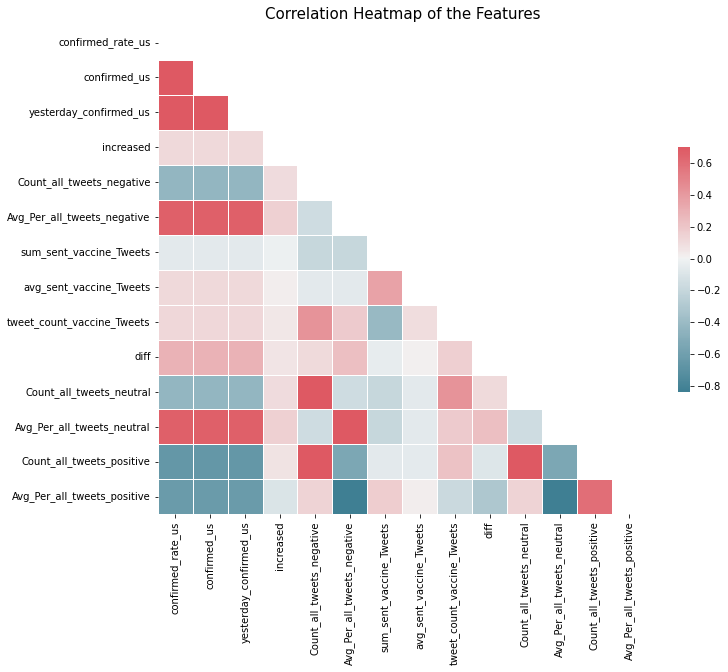

In [21]:
#df = df.drop(['Date'], axis=1)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Choose a different colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of the Features', fontsize=15)
plt.show()


For darkest colours in the row and column of diff, 'confirmed_rate_us',	'confirmed_us',	'yesterday_confirmed_us', 'Avg_Per_all_tweets_negative', 'tweet_count_vaccine_Tweets','Count_all_tweets_neutral', 'Avg_Per_all_tweets_neutral',	 'Count_all_tweets_positive' shall be good to choose as features. 

As a result, we choose 'yesterday_confirmed_us', 'Avg_Per_all_tweets_negative', 'tweet_count_vaccine_Tweets', 'Count_all_tweets_neutral', 'Count_all_tweets_positive' as our features. 

In [22]:
df['yesterday_confirmed_us_log']=np.log(df['yesterday_confirmed_us'])
df['Count_all_tweets_negative_log']=np.log(df['Count_all_tweets_negative'])
df['Count_all_tweets_neutral_log']=np.log(df['Count_all_tweets_neutral'])
df['Count_all_tweets_positive_log']=np.log(df['Count_all_tweets_positive'])


In [23]:
column_names = df.columns.tolist()
column_names

['confirmed_rate_us',
 'confirmed_us',
 'yesterday_confirmed_us',
 'increased',
 'Count_all_tweets_negative',
 'Avg_Per_all_tweets_negative',
 'sum_sent_vaccine_Tweets',
 'avg_sent_vaccine_Tweets',
 'tweet_count_vaccine_Tweets',
 'diff',
 'Count_all_tweets_neutral',
 'Avg_Per_all_tweets_neutral',
 'Count_all_tweets_positive',
 'Avg_Per_all_tweets_positive',
 'yesterday_confirmed_us_log',
 'Count_all_tweets_negative_log',
 'Count_all_tweets_neutral_log',
 'Count_all_tweets_positive_log']

In [24]:
import pandas as pd

# assuming df is your Pandas DataFrame
# calculate the IQR for each column in the DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# remove any data points that fall outside of the IQR
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [25]:
#df = df.drop(['Date', 'confirmed_rate_us', 'confirmed_us', 'yesterday_confirmed_us', 'increased',''], axis=1)
#df.head()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select the features


X = df_clean[['yesterday_confirmed_us_log', 'sum_sent_vaccine_Tweets',  'Avg_Per_all_tweets_negative',
        'Count_all_tweets_negative_log', 'Count_all_tweets_neutral_log', 
        'Count_all_tweets_positive_log']]
y = df_clean['diff']



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Print the root mean squared error of the model
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Root Mean Squared Error: 58098.4386314231


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Absolute Error (MAE): 48329.27489804959
Mean Squared Error (MSE): 3375428571.409236
Root Mean Squared Error (RMSE): 58098.4386314231
R-squared: 0.03448406325548281
